In [1]:
#importing all necessary libraries/software
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from time import sleep
import csv
import requests
import urllib

START OF SONG SCRAPING 


In [2]:
#url to scrape song list from 
#0 and 1 are place holders for artists name and page extension
base_url = 'https://www.azlyrics.com/{0}/{1}.html' 

In [3]:
#making artists list + making empty dictionary for scraped song data
artists_first_names = ["haley"]
artists_last_names = ["heynderickx"]
artists_full_names = ["haleyheynderickx"]
artists = ["haleyheynderickx"]
songs_dict = {}

In [4]:
#get 1st characters of artists last names
first_char = [w[0] for w in artists_last_names]
first_char 

['h']

In [50]:
###KEEP TOGETHER OR ELSE IT DOESN'T LIKE TO RUN####

#loop through each artist in artists [list] 
#to create a specific URL using base_url 
#w/ first character of artists name + full artist name 
#then print URL going to scrape 
for artist in artists:
    artist_last_name = artist.split()[-1].lower()
    artist_full_name = artist.lower()
    artist_url = base_url.format(artist_last_name[0], artist_full_name)
    print("Going to url:", artist_url)
    # rest of the code
###HAD TO CHANGE IT TO LAST NAMES B/C THE URL DIDN'T MATCH WHEN IT RAN 1ST LETTER OF 1ST NAME

    #Make the HTTP request and parse the HTML
    headers = {'User-Agent': 'Mozilla/5.0'}  
    # Set user-agent header to avoid potential blocking by mimicking a web browser
    response = requests.get(artist_url, headers=headers)
    #use get to send an HTTP GET request to the artist_url 
    content = response.content 
    soup = BeautifulSoup(content, 'html.parser')
    #Parse using beautiful soup

    #find + get the song list in the HTML sturcture of page 
    songs_list = soup.find_all('div', attrs={'class': 'listalbum-item'})

    #make empty list for songs_dict + take text of song and add to artist's list of songs in 'songs_dict'
    songs_dict[artist_last_name] = []
    
    for song in songs_list:
        song_name = song.text.strip()
        songs_dict[artist].append(song_name)
    print("Artist:", artist_last_name)
    print(songs_dict[artist_last_name][:5])
    #10 second delay to not overwhelm server w/ requests 
    sleep(10)
#go over 'songs_dict' to print each artist's name + total # of songs have
#then print entire dictionary w/ all scraped son data 
for key, val in songs_dict.items():
    print(key, len(val))
print(songs_dict)

#Run time 22 sec

Going to url: https://www.azlyrics.com/h/haleyheynderickx.html


Artist: haleyheynderickx
['Drinking Song', "First I'm Sorry", 'Fish Eyes', 'Sane', 'No Face']
haleyheynderickx 21
{'haleyheynderickx': ['Drinking Song', "First I'm Sorry", 'Fish Eyes', 'Sane', 'No Face', 'The Bug Collector', 'Jo', 'Worth It', 'Show You A Body', 'Untitled God Song', 'Oom Sha La La', 'Drinking Song', "Slow Talkin'", 'Francis', 'Mother', 'Little Wind', 'The Park', 'Crow Song', "Big Ol' Miyazaki Tears (Live)", 'Construction At 8AM (Live)', 'Ride A Pack Of Bees']}


In [51]:
import json
json_file = "Haley_Heynderickx-Songs Mapping.json"

with open(json_file, 'w') as file:
    json.dump(songs_dict, file)

with open(json_file) as f:
    a = json.load(f)
    print(a) 

{'haleyheynderickx': ['Drinking Song', "First I'm Sorry", 'Fish Eyes', 'Sane', 'No Face', 'The Bug Collector', 'Jo', 'Worth It', 'Show You A Body', 'Untitled God Song', 'Oom Sha La La', 'Drinking Song', "Slow Talkin'", 'Francis', 'Mother', 'Little Wind', 'The Park', 'Crow Song', "Big Ol' Miyazaki Tears (Live)", 'Construction At 8AM (Live)', 'Ride A Pack Of Bees']}


BEGINNING OF LYRIC SCRAPING 

In [86]:
,with open("Proxy_list.txt", "w") as testtxt:
    testtxt.write(
14.162.162.186:8080,
200.62.96.71:80,
103.141.142.102:41367,
213.230.127.93:3128,
58.27.59.249:80,
160.72.82.101:80,
192.111.150.17:8080,
161.35.70.249:3128,
47.90.162.160:8080,
196.20.125.157:8083,
144.217.233.75:80,
103.118.78.194:80,
139.59.1.14:8080,
196.20.125.129:8083,
45.70.202.13:8089,
51.15.242.202:8888,
192.111.150.15:8080,
198.49.68.80:80,
27.107.27.14:80,
130.61.158.19:80,
38.44.237.52:999,
178.33.3.163:8080,
174.138.88.120:3128,
124.105.177.237:8080,
124.198.90.115:12652,
103.83.232.122:80,
137.74.65.101:80,
103.174.66.195:8080,
192.111.150.4:8080,
121.126.200.123:11361,
192.111.150.9:8080,
113.161.131.43:80,
146.59.199.12:80,
192.111.150.8:8080,
185.78.29.95:3128,
64.225.8.82:9981,
66.135.14.166:443,
45.63.25.2:8888,
213.241.205.2:8080,
47.74.152.29:8888,
123.193.231.167:80
192.111.150.19:8080
103.49.202.252:80
173.255.242.191:80
103.77.60.14:80
103.117.192.14:80
27.107.27.11:80
103.127.1.130:80
78.46.190.133:8000
103.133.210.133:80
103.210.57.243:80
34.233.119.103:80
217.76.50.200:8000
216.137.184.253:80
109.194.101.128:3128
103.168.53.1:41317
162.241.207.217:80
34.238.235.194:80
47.88.3.19:8080
91.221.67.197:8082
195.181.172.213:8080
20.157.194.61:80
185.219.135.191:80
46.47.197.210:3128
125.141.151.83:80
49.51.184.233:8080
45.62.167.249:80
115.144.119.229:10204
139.162.78.109:8080
103.141.143.1:41485
13.95.173.197:80
192.111.150.12:8080
117.54.114.99:80
146.196.54.68:443
60.52.61.36:80
47.252.27.174:443
186.121.235.66:8080
35.213.91.45:80
68.183.230.116:42087
188.166.56.246:80
103.168.53.53:41367
162.223.94.164:80
154.236.191.45:8080
181.209.114.196:999
198.244.175.232:8080
27.77.144.94:10002
123.30.154.171:7777,
142.11.232.45:80,
154.65.39.7:80,
47.243.177.210:8088,
138.68.225.200:80,
115.77.27.149:4011,
154.236.179.226:1981,
85.226.30.137:80,
158.69.53.98:9300,
181.205.86.66:32650,
171.243.114.130:10012,
112.217.162.5:3128,
50.171.32.230:80,
50.237.89.170:80,
50.218.57.74:80,
213.143.113.82:80,
50.235.240.86:80,
82.119.96.254:80,
50.171.1.222:80,
50.228.141.99:80,
127.0.0.7:80,
180.183.200.46:8080,
103.92.225.206:8080,
54.169.157.254:3128,
185.108.141.49:8080,
107.6.109.62:3128,
197.251.233.124:8080,
183.88.212.184:8080,
47.254.192.125:3128,
103.155.196.135:3125,
146.59.49.200:3128,
49.231.129.3:8080,
85.173.165.36:46330,
188.64.132.59:3127,
103.154.91.182:8080,
181.78.65.2:8080,
185.15.244.162:80,
207.2.120.57:80,
13.81.217.201:80,
128.199.0.28:8888,
43.205.236.198:80,
144.217.253.209:9300,
167.172.62.114:80,
115.144.102.132:10041,
103.134.44.176:8080,
114.142.187.138:8080,
103.36.11.13:8181,
46.182.6.51:3129,
115.144.101.201:10001,
115.144.99.220:11116,
154.236.179.227:1981,
158.69.73.79:9300,
64.225.4.29:9865,
35.240.156.235:8080,
136.243.55.199:3128,
103.216.103.163:80,
146.83.128.23:80,
190.2.137.225:3128,
50.168.163.166:80,
209.97.150.167:3128,
107.1.93.215:80,
104.207.131.40:80,
107.1.93.212:80,
50.237.89.161:80,
158.160.56.149:8080,
20.44.206.138:80,
8.219.97.248:80,
2.83.198.171:80,
50.237.89.164:80,
195.201.99.153:80,
50.220.189.30:80,
51.124.209.11:80,
50.221.227.130:80,
43.241.69.35:80,
32.223.6.94:80,
195.90.210.211:80
50.230.222.202:80
117.54.114.35:80
138.88.145.33:80
139.177.185.242:80
8.209.114.72:3129
176.126.70.112:80
143.42.163.193:80
188.235.0.207:8181
20.205.61.143:8123
185.15.172.212:3128
51.79.50.31:9300
50.171.2.12:80
50.174.7.153:80
103.141.143.102:41516
50.222.245.43:80
50.171.68.130:80
34.124.225.130:8080
64.225.8.191:9992
148.251.110.152:3128
158.69.74.53:9300
154.79.250.148:32650
179.43.94.237:999
167.71.5.83:8080
153.19.91.77:80
139.99.237.62:80
113.53.231.133:3129
102.68.85.187:8080
202.61.204.51:80
54.219.125.50:8080
162.223.94.163:80
212.182.90.118:80
24.199.83.216:8080
173.249.30.165:3128
179.40.95.36:999
138.121.113.224:999
83.171.90.83:8080
45.224.20.70:999
138.118.38.3:999
103.80.237.28:8899
179.153.18.43:8080
177.234.238.36:8080
202.51.114.210:3128
165.16.43.63:8080
138.117.85.244:8080
103.1.51.68:3125
31.146.5.178:8080
49.128.176.41:3127
190.13.85.5:8080
180.191.40.73:8081
157.245.27.11:31280
45.184.86.34:999
164.92.234.204:3128
176.37.21.46:41890
187.251.222.69:8080
181.115.200.59:3128
103.159.195.198:8081
103.253.127.14:8080
176.236.191.17:3111
3.16.90.99:3128
217.160.54.185:3128
52.118.191.193:3128
103.85.114.240:8080
198.44.188.55:45787
43.129.223.147:38080
20.24.43.214:80
47.91.45.235:45554
20.210.113.32:80
5.161.41.17:80
179.1.132.130:8080
138.68.60.8:8080
3.36.130.175:80
198.11.175.180:8080
20.206.106.192:80
84.248.46.187:80
103.163.51.254:80
165.16.27.35:1981
47.56.110.204:8989
128.199.202.122:3128
52.41.249.10:80
47.252.1.180:1234
203.198.207.253:80
190.61.88.147:8080
45.79.17.203:80
219.68.43.251:80
103.234.55.173:80
190.128.241.102:80
212.19.8.215:8080
187.217.54.84:80
51.178.47.12:80
103.197.251.202:80
46.10.209.230:8080
41.186.44.106:3128
27.147.174.107:8080
64.225.4.63:9993
20.122.27.242:80,
78.28.152.113:80,
85.95.239.81:8118,
146.158.19.130:8080,
46.105.35.193:8080
102.220.121.56:3128
46.101.219.34:80,
138.68.235.51:80,
24.152.40.49:8080,
140.238.245.116:8100,
185.97.115.181:3128,
12.69.91.227:80,
52.47.137.181:80,
165.0.50.110:8080,
35.154.18.192:80,
43.132.175.181:81,
202.86.138.18:8080,
90.154.124.211:8080,
47.91.95.174:808,
88.99.249.96:8255,
78.138.98.115:3128,
191.243.46.18:43241,
192.241.238.167:31028,
64.225.8.115:9996,
110.34.3.229:3128,
200.105.215.22:33630,
46.228.199.252:5555,
107.148.193.162:1080,
64.225.8.179:9998,
103.66.168.20:80,
68.178.161.107:80,
103.133.221.251:80,
149.28.25.61:80,
164.52.206.180:80,
45.81.145.131:8080,
186.154.219.2:999,
147.78.169.80:8443,
201.159.113.25:1994,
103.173.139.254:8080,
123.253.62.50:3128,
103.170.22.52:8089,
45.6.4.59:8081,
103.165.155.226:1111,
118.99.96.173:8080")

SyntaxError: unterminated string literal (detected at line 2) (3609650447.py, line 2)

In [ ]:
with open('proxy_list.txt', 'w') as f:
    f.write('some data')
    f.close()

THE NEXT PORTION OF SCRAPING/CODE IN MARKDOWN RN B/C IT TAKES ABOUT 45 MIN TO RUN EACH TIME

In [1]:
###YAY IT SEEMS TO BE WORKING... THIS ONE DOESN'T ALLOW
#FOR ROTATION OF DIFFERENT ARTISTS#

import threading
import queue
import requests 
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import csv
import json
import re
import time
import random
import pandas as pd


# Load the Artists-Songs Mapping.json file
with open("Haley_Heynderickx-Songs Mapping.json") as file:
    songs_dict = json.load(file)

# artist for which the lyrics need to be written
artists_full_name = "haleyheynderickx"
artists_last_names = "heynderickx"
artists = "haleyheynderickx"
songs = songs_dict[artists]
processed_songs = []

# preprocessing the songs name for scraping
for song in songs:
    numbers_in_brackets_removed = re.sub(r'\(.*\)',"",song)
    processed_song = re.sub(r'\W+', '', numbers_in_brackets_removed).lower()
    processed_songs.append(processed_song)

# Removing duplicate songs
processed_songs = list(set(processed_songs))

# url to scrape the lyrics from
base_url = "https://www.azlyrics.com/lyrics/{}/{}.html"

# file in which the lyrics would be saved
lyrics_file = "lyrics_scraped_heynderickx.txt"

# Making variables/lists
song_lyrics = []
titles = []
lyrics_not_found_for = []

# Load the list of proxies from Proxy_list.txt
with open("Proxy_list.txt", "r") as f:
    proxies = f.read().split("\n")

# Initialize a RequestsToolProxy object with the list of proxies
requests_tool_proxy = requests.Session()

# Randomized delay between requests
min_delay = 7
max_delay = 23

with open(lyrics_file, "w") as file:
    for song in processed_songs:
        final_url = base_url.format(artists_full_name, song)

        try:
            # Make the request to the URL using the RequestsToolProxy object
            response = requests_tool_proxy.get(final_url, proxies={'http': random.choice(proxies), 'https': random.choice(proxies)})

            # Parse the HTML response using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Find song name
            html_pointer = soup.find('div', attrs={'class':'ringtone'})
            song_name = html_pointer.find_next('b').contents[0].strip()
            
            # Get lyrics
            lyrics = html_pointer.find_next('div').text.strip()
            
            # Append the lyrics and song name to the respective lists
            song_lyrics.append(lyrics)
            titles.append(song_name)

            # Write the lyrics to the lyrics file
            file.write("###"+song_name+"###")
            file.write("\n\n")
            file.write(lyrics)
            file.write("\n\n")
            
            print("Lyrics successfully written to file for : " + song_name)
            
        except:
            print("Lyrics not found for : " + song)
            lyrics_not_found_for.append(song)
            
        finally:
            # Randomized delay between requests
            delay = random.randint(min_delay, max_delay)
            sleep(delay)

##RUN TIME ~5 min 

Lyrics not found for : jo
Lyrics not found for : firstimsorry


###YAY IT SEEMS TO BE WORKING... THIS ONE DOESN'T ALLOW
#FOR ROTATION OF DIFFERENT ARTISTS#

import threading
import queue
import requests 
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import csv
import json
import re
import time
import random
import pandas as pd


# Load the Artists-Songs Mapping.json file
with open("Haley_Heynderickx-Songs Mapping.json") as file:
    songs_dict = json.load(file)

# artist for which the lyrics need to be written
artists_full_name = "haleyheynderickx"
artists_last_names = "heynderickx"
songs = songs_dict[artists_last_names]
processed_songs = []

# preprocessing the songs name for scraping
for song in songs:
    numbers_in_brackets_removed = re.sub(r'\(.*\)',"",song)
    processed_song = re.sub(r'\W+', '', numbers_in_brackets_removed).lower()
    processed_songs.append(processed_song)

# Removing duplicate songs
processed_songs = list(set(processed_songs))

# url to scrape the lyrics from
base_url = "https://www.azlyrics.com/lyrics/{}/{}.html"

# file in which the lyrics would be saved
lyrics_file = "lyrics_scraped_heynderickx.txt"

# Making variables/lists
song_lyrics = []
titles = []
lyrics_not_found_for = []

# Load the list of proxies from Proxy_list.txt
with open("Proxy_list.txt", "r") as f:
    proxies = f.read().split("\n")

# Initialize a RequestsToolProxy object with the list of proxies
requests_tool_proxy = requests.Session()

# Randomized delay between requests
min_delay = 7
max_delay = 23

with open(lyrics_file, "w") as file:
    for song in processed_songs:
        final_url = base_url.format(artists_full_name, song)

        try:
            # Make the request to the URL using the RequestsToolProxy object
            response = requests_tool_proxy.get(final_url, proxies={'http': random.choice(proxies), 'https': random.choice(proxies)})

            # Parse the HTML response using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Find song name
            html_pointer = soup.find('div', attrs={'class':'ringtone'})
            song_name = html_pointer.find_next('b').contents[0].strip()
            
            # Get lyrics
            lyrics = html_pointer.find_next('div').text.strip()
            
            # Append the lyrics and song name to the respective lists
            song_lyrics.append(lyrics)
            titles.append(song_name)

            # Write the lyrics to the lyrics file
            file.write("###"+song_name+"###")
            file.write("\n\n")
            file.write(lyrics)
            file.write("\n\n")
            
            print("Lyrics successfully written to file for : " + song_name)
            
        except:
            print("Lyrics not found for : " + song)
            lyrics_not_found_for.append(song)
            
        finally:
            # Randomized delay between requests
            delay = random.randint(min_delay, max_delay)
            sleep(delay)

###RUN TIME ~43 MIN FOR 148? SONGS###

In [67]:
# Print the list of songs for which lyrics were not found
if len(lyrics_not_found_for) > 0:
    print("Lyrics not found for the following songs:")
    for song in lyrics_not_found_for:
        print(song)
else:
    print("Lyrics were found for all songs!")

Lyrics were found for all songs!


In [55]:
###FOR HEYNDERICKX###

#didn't find constructionat8am, bigolmiyazakitears
#CORRECT HTML: bigolmiyazakitearslive, constructionat8amlive


In [91]:
contents = "14.162.162.186:8080", "200.62.96.71:80", "103.141.142.102:41367", "213.230.127.93:3128","58.27.59.249:80","160.72.82.101:80","192.111.150.17:8080","161.35.70.249:3128","47.90.162.160:8080","196.20.125.157:8083","144.217.233.75:80","103.118.78.194:80","139.59.1.14:8080","196.20.125.129:8083","45.70.202.13:8089","51.15.242.202:8888","192.111.150.15:8080","198.49.68.80:80","27.107.27.14:80","130.61.158.19:80","38.44.237.52:999","178.33.3.163:8080","174.138.88.120:3128","124.105.177.237:8080","124.198.90.115:12652",
"103.83.232.122:80","137.74.65.101:80","103.174.66.195:8080","192.111.150.4:8080","121.126.200.123:11361","192.111.150.9:8080","113.161.131.43:80",
"146.59.199.12:80",
"192.111.150.8:8080",
"185.78.29.95:3128",
"64.225.8.82:9981",
"66.135.14.166:443",
"45.63.25.2:8888",
"213.241.205.2:8080",
"47.74.152.29:8888",
"123.193.231.167:80", "192.111.150.19:8080","103.49.202.252:80",
"173.255.242.191:80","103.77.60.14:80",
"103.117.192.14:80",
"27.107.27.11:80",
"103.127.1.130:80",
"78.46.190.133:8000",
"103.133.210.133:80",
"103.210.57.243:80",
"34.233.119.103:80",
"217.76.50.200:8000",
"216.137.184.253:80",
"109.194.101.128:3128",
"103.168.53.1:41317",
"162.241.207.217:80",
"34.238.235.194:80",
"47.88.3.19:8080",
"91.221.67.197:8082",
"195.181.172.213:8080",
"20.157.194.61:80",
"185.219.135.191:80",
"46.47.197.210:3128",
"125.141.151.83:80",
"49.51.184.233:8080",
"45.62.167.249:80",
"115.144.119.229:10204",
"139.162.78.109:8080",
"103.141.143.1:41485",
"13.95.173.197:80",
"192.111.150.12:8080",
"117.54.114.99:80",
"146.196.54.68:443",
"60.52.61.36:80",
"47.252.27.174:443",
"186.121.235.66:8080",
"35.213.91.45:80",
"68.183.230.116:42087",
"188.166.56.246:80",
"103.168.53.53:41367",
"162.223.94.164:80",
"154.236.191.45:8080",
"181.209.114.196:999",
"198.244.175.232:8080",
"27.77.144.94:10002",
"123.30.154.171:7777",
"142.11.232.45:80",
"154.65.39.7:80",
"47.243.177.210:8088",
"138.68.225.200:80",
"115.77.27.149:4011",
"154.236.179.226:1981",
"85.226.30.137:80",
"158.69.53.98:9300",
"181.205.86.66:32650",
"171.243.114.130:10012",
"112.217.162.5:3128",
"50.171.32.230:80",
"50.237.89.170:80",
"50.218.57.74:80",
"213.143.113.82:80",
"50.235.240.86:80",
"82.119.96.254:80",
"50.171.1.222:80",
"50.228.141.99:80",
"127.0.0.7:80",
"180.183.200.46:8080",
"103.92.225.206:8080",
"54.169.157.254:3128",
"185.108.141.49:8080",
"107.6.109.62:3128",
"197.251.233.124:8080",
"183.88.212.184:8080",
"47.254.192.125:3128",
"103.155.196.135:3125",
"146.59.49.200:3128",
"49.231.129.3:8080",
"85.173.165.36:46330",
"188.64.132.59:3127",
"103.154.91.182:8080",
"181.78.65.2:8080",
"185.15.244.162:80",
"207.2.120.57:80",
"13.81.217.201:80",
"128.199.0.28:8888",
"43.205.236.198:80",
"144.217.253.209:9300",
"167.172.62.114:80",
"115.144.102.132:10041",
"103.134.44.176:8080",
"114.142.187.138:8080",
"103.36.11.13:8181",
"46.182.6.51:3129",
"115.144.101.201:10001",
"115.144.99.220:11116",
"154.236.179.227:1981",
"158.69.73.79:9300",
"64.225.4.29:9865",
"35.240.156.235:8080",
"136.243.55.199:3128",
"103.216.103.163:80",
"146.83.128.23:80",
"190.2.137.225:3128",
"50.168.163.166:80",
"209.97.150.167:3128",
"107.1.93.215:80",
"104.207.131.40:80",
"107.1.93.212:80",
"50.237.89.161:80",
"158.160.56.149:8080",
"20.44.206.138:80",
"8.219.97.248:80",
"2.83.198.171:80",
"50.237.89.164:80",
"195.201.99.153:80",
"50.220.189.30:80",
"51.124.209.11:80",
"50.221.227.130:80",
"43.241.69.35:80",
"32.223.6.94:80",
"195.90.210.211:80",
"50.230.222.202:80",
"117.54.114.35:80",
"138.88.145.33:80",
"139.177.185.242:80",
"8.209.114.72:3129",
"176.126.70.112:80",
"143.42.163.193:80",
"188.235.0.207:8181",
"20.205.61.143:8123",
"185.15.172.212:3128",
"51.79.50.31:9300",
"50.171.2.12:80",
"50.174.7.153:80",
"103.141.143.102:41516",
"50.222.245.43:80",
"50.171.68.130:80",
"34.124.225.130:8080",
"64.225.8.191:9992",
"148.251.110.152:3128",
"158.69.74.53:9300",
"154.79.250.148:32650",
"179.43.94.237:999",
"167.71.5.83:8080",
"153.19.91.77:80",
"139.99.237.62:80",
"113.53.231.133:3129",
"102.68.85.187:8080",
"202.61.204.51:80",
"54.219.125.50:8080",
"162.223.94.163:80",
"212.182.90.118:80",
"24.199.83.216:8080",
"173.249.30.165:3128",
"179.40.95.36:999",
"138.121.113.224:999",
"83.171.90.83:8080",
"45.224.20.70:999",
"138.118.38.3:999",
"103.80.237.28:8899",
"179.153.18.43:8080",
"177.234.238.36:8080",
"202.51.114.210:3128",
"165.16.43.63:8080",
"138.117.85.244:8080",
"103.1.51.68:3125",
"31.146.5.178:8080",
"49.128.176.41:3127",
"190.13.85.5:8080",
"180.191.40.73:8081",
"157.245.27.11:31280",
"45.184.86.34:999",
"164.92.234.204:3128",
"176.37.21.46:41890",
"187.251.222.69:8080",
"181.115.200.59:3128",
"103.159.195.198:8081",
"103.253.127.14:8080",
"176.236.191.17:3111",
"3.16.90.99:3128",
"217.160.54.185:3128",
"52.118.191.193:3128",
"103.85.114.240:8080",
"198.44.188.55:45787",
"43.129.223.147:38080",
"20.24.43.214:80",
"47.91.45.235:45554",
"20.210.113.32:80",
"5.161.41.17:80",
"179.1.132.130:8080",
"138.68.60.8:8080",
"3.36.130.175:80",
"198.11.175.180:8080",
"20.206.106.192:80",
"84.248.46.187:80",
"103.163.51.254:80",
"165.16.27.35:1981",
"47.56.110.204:8989",
"128.199.202.122:3128",
"52.41.249.10:80",
"47.252.1.180:1234",
"203.198.207.253:80",
"190.61.88.147:8080",
"45.79.17.203:80",
"219.68.43.251:80",
"103.234.55.173:80",
"190.128.241.102:80",
"212.19.8.215:8080",
"187.217.54.84:80",
"51.178.47.12:80",
"103.197.251.202:80",
"46.10.209.230:8080",
"41.186.44.106:3128",
"27.147.174.107:8080",
"64.225.4.63:9993",
"20.122.27.242:80",
"78.28.152.113:80",
"85.95.239.81:8118",
"146.158.19.130:8080",
"46.105.35.193:8080",
"102.220.121.56:3128",
"46.101.219.34:80",
"138.68.235.51:80",
"24.152.40.49:8080",
"140.238.245.116:8100",
"185.97.115.181:3128",
"12.69.91.227:80",
"52.47.137.181:80",
"165.0.50.110:8080",
"35.154.18.192:80",
"43.132.175.181:81",
"202.86.138.18:8080",
"90.154.124.211:8080",
"47.91.95.174:808",
"88.99.249.96:8255",
"78.138.98.115:3128",
"191.243.46.18:43241",
"192.241.238.167:31028",
"64.225.8.115:9996",
"110.34.3.229:3128",
"200.105.215.22:33630",
"46.228.199.252:5555",
"107.148.193.162:1080",
"64.225.8.179:9998",
"103.66.168.20:80",
"68.178.161.107:80",
"103.133.221.251:80",
"149.28.25.61:80",
"164.52.206.180:80",
"45.81.145.131:8080",
"186.154.219.2:999",
"147.78.169.80:8443",
"201.159.113.25:1994",
"103.173.139.254:8080",
"123.253.62.50:3128",
"103.170.22.52:8089",
"45.6.4.59:8081",
"103.165.155.226:1111",
"118.99.96.173:8080"
with open("Proxy_list.txt", "w") as testtxt:
    testtxt.write("\n".join(contents))

IndentationError: unexpected indent (1329782636.py, line 29)

TypeError: write() argument must be str, not tuple

In [65]:
###EDITING ALL THE SONGS THAT WASN'T FOUND TO CORRECT HTML###
#import json


# Load the existing JSON file
#with open("Haley_Heynderickx-Songs Mapping.json", "r") as f:
    #data = json.load(f)

# Modify the song title for an artist
#artist = ("haleyheynderickx")
#song_index = 19 # index of the song to be modified
#new_song_title = "Construction At 8AM Live "

#if artist in data: 
    #songs = data[artist]
    #if song_index < len(songs): 
        #songs[song_index] = new_song_title
    #else:
        #print(f"Song @ index {18} for {aritst} updated to '{new_song_title}'")
#else:
    #print(f'Error: Song index {song_index} out of range for {artist}')
#data[artists_full_names][song_index] = new_song_title

# Write the updated dictionary to the file
#with open("Haley_Heynderickx-Songs Mapping.json", "w") as f:
    #json.dump(data, f)


In [68]:
final_dict = dict(zip(titles, song_lyrics))

In [69]:
import json
json_file = "Haley_Heynderickx_Lyrics.json"
with open(json_file, 'w') as file:
    json.dump(final_dict, file)

In [71]:
print("Total count : ", len(songs),"songs")
print("Lyrics successfully scraped for : ", len(songs)-len(lyrics_not_found_for), "songs")
print("Lyrics not found for :", len(lyrics_not_found_for),"songs\n")
#print("\nHere's the list :\n")
#print(lyrics_not_found_for)

Total count :  21 songs
Lyrics successfully scraped for :  21 songs
Lyrics not found for : 0 songs



###BEGINNING OF CLEANING###

In [4]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')


In [5]:
df = pd.read_json('Haley_Heynderickx_Lyrics.json', orient = 'records', typ='series')
df

"Francis"                          Driving through the darkness\nHungover and car...
"Untitled God Song"                And maybe my God\nHas a trot in her walk\nAnd ...
"No Face"                          Face me\nFace me entirely\nTell me\nTell me wh...
"Jo"                               Joan\nYou are alone\nYour kindness\nThe sweete...
"Little Wind"                      I might go to Spain\nSleep out with the dogs\n...
"First I'm Sorry"                  You had me first\nAnd traced my lips I'm sorry...
"Ride A Pack Of Bees"              Look at me\nI'm somewhere close to flying\nLim...
"Show You A Body"                  I am letting you go\nI am letting you go\nI am...
"The Bug Collector"                And there's a centipede\nNaked in your bedroom...
"Drinking Song"                    There's a light at the end that I know\nWhere ...
"Mother"                           Born in the east, raised by the west\nTorn in ...
"Construction At 8AM (Live)"       Sentimental mornings as you\nC

In [6]:
#deleting anything that's in a []#

#new_df = df['Lyrics'].replace("[\[\[].*?[\]\]]", "",regex=True)
#new_df = pd.DataFrame(new_df)
#new_df


new_df = pd.DataFrame(df.str.replace("[\[\[].*?[\]\]]", "",regex=True), columns=['Lyrics'])
new_df

,Lyrics
"""Francis""",Driving through the darkness\nHungover and car...
"""Untitled God Song""",And maybe my God\nHas a trot in her walk\nAnd ...
"""No Face""",Face me\nFace me entirely\nTell me\nTell me wh...
"""Jo""",Joan\nYou are alone\nYour kindness\nThe sweete...
"""Little Wind""",I might go to Spain\nSleep out with the dogs\n...
"""First I'm Sorry""",You had me first\nAnd traced my lips I'm sorry...
"""Ride A Pack Of Bees""",Look at me\nI'm somewhere close to flying\nLim...
"""Show You A Body""",I am letting you go\nI am letting you go\nI am...
"""The Bug Collector""",And there's a centipede\nNaked in your bedroom...
"""Drinking Song""",There's a light at the end that I know\nWhere ...


In [7]:
#Delete \n and \r line breaks 
df_stripped = new_df['Lyrics'].str.replace('\n',' ').str.replace('\r',' ').str[0:]
df_stripped

"Francis"                          Driving through the darkness Hungover and cars...
"Untitled God Song"                And maybe my God Has a trot in her walk And he...
"No Face"                          Face me Face me entirely Tell me Tell me what'...
"Jo"                               Joan You are alone Your kindness The sweetest ...
"Little Wind"                      I might go to Spain Sleep out with the dogs Fi...
"First I'm Sorry"                  You had me first And traced my lips I'm sorry ...
"Ride A Pack Of Bees"              Look at me I'm somewhere close to flying Limbs...
"Show You A Body"                  I am letting you go I am letting you go I am l...
"The Bug Collector"                And there's a centipede Naked in your bedroom ...
"Drinking Song"                    There's a light at the end that I know Where c...
"Mother"                           Born in the east, raised by the west Torn in b...
"Construction At 8AM (Live)"       Sentimental mornings as you Cr

In [8]:
#The index has quotemarks...create a column from the index
#in new column strip quotemarks
#Then new column for index

df_stripped = pd.DataFrame(df_stripped)
df_stripped['Songs'] = df_stripped.index
df_stripped['Songs'] = df_stripped['Songs'].str.replace('\"','')
df_stripped.set_index('Songs',inplace=True)
df_stripped.head()

,Lyrics
Songs,
Francis,Driving through the darkness Hungover and cars...
Untitled God Song,And maybe my God Has a trot in her walk And he...
No Face,Face me Face me entirely Tell me Tell me what'...
Jo,Joan You are alone Your kindness The sweetest ...
Little Wind,I might go to Spain Sleep out with the dogs Fi...


In [9]:
#save df to a csv 
df_stripped.to_csv('Haley Heynderickx Lyrics Cleaned.csv')

READING NEW CREATED CSV THAT HAS TRACK # + YEAR + TITLE ALBUM + ARTIST 

In [6]:
import pandas as pd
import glob
import os

In [7]:
df = pd.concat(
    map(pd.read_csv, ["/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Other Songs-HH.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Fish Eyes EP.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/I Need To Start A Garden.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Among Horses III.csv"]), ignore_index=True)

print(df.columns.tolist())

df.columns = ['Artist ', 'Year', 'Month', 'Album_Title', 'Track_Title', 'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']

print(df.columns)

['Artist ', 'Year ', 'Month', 'Album_Title', 'Track_Title', 'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']
Index(['Artist ', 'Year', 'Month', 'Album_Title', 'Track_Title',
       'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


import pandas as pd
import glob

# Define the path to the directory containing the CSV files
csv_dir = "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs"

# Use glob to find all CSV files in the directory
csv_files = glob.glob(f"{csv_dir}/*.csv")

# Define a list to hold the DataFrames for each CSV file
df_list = []

# Loop over the CSV files
for file in csv_files:
    # Read in the CSV file as a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    df_list.append(df)

# Loop through each CSV file
for file in csv_files:
    # Read in the CSV file
    df = pd.read_csv(file)
    # Delete the first row of the DataFrame
    df = df.iloc[1:]
    # Append the modified DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

csv_files = ["/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Fish Eyes EP.csv",
             "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/I Need To Start A Garden.csv",
             "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Among Horses III.csv"]

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    print(f"First 5 rows of {file}:")
    print(df.head())
    encoding = 'latin-1'
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [11]:
#songs = df.groupby("Track_Title").agg({"Lyric": lambda x: " ".join(x), 'Year': "average"}).reset_index()
#songs = df.groupby("Track_Title").agg({"Lyric": lambda x: " ".join(x), "Month": "max"}).reset_index()


songs = df.copy()  # make a copy of the original DataFrame
songs['Year_Month'] = songs['Year'].astype(str) + '-' + songs['Month'].astype(str)  # create a new column that combines Year and Month
songs = songs.groupby(["Track_Title", "Year_Month"]).agg({"Lyric": lambda x: " ".join(x)}).reset_index()  # group by Track_Title and Year_Month

#x representing list of each different lines of lyrics for a track title 
#groupby = put everything in a list 
#.join strings all lyrics into block of lyrics
#year will be same for each row...but need aggregating...so getting max year for each individual row
#reset_index() is making it easy so can select all columns moving forward


In [12]:
pd.options.display.max_colwidth = 5000
#saying how many characters can shown in individual column in dataframe
#...saying want more characters available 

In [13]:
songs.head()

,Track_Title,Year_Month,Lyric
0,Big Ol' Miyazaki Tears Live,nan-nan,If you were clay and I am silt I'm built on weak deposits as the ocean fills me Push and pull the break of the dawn If only I could hold it in a small clay pot And solitude they treat you well Until they burn you down And the dreaded voices tell you All your faults in small clay pots I've dropped them all around you as picked them up And hold my hand And hold my hand And hold my hand And hold my hand It's back it's back the demons on my back You knock them off so gently like they're bowling pins or cobwebs It's fine it's fine You whispered instead and held my hands so gently I could lengthen out my loneliness And hold my hand And hold my hand And hold my hand And hold my hand And I wish that I had known I wish that I had seen Wish that I had known how much you'd done for me And I wish that I had noticed Wish that I had noticed I wish that I had known how much you'd done for me And hold my hand And hold my hand You hold my hand You hold my hand If you were clay and I am silt I'm built on weak deposits as the ocean fills me Push and pull the break of the dawn If only I could hold it in a small clay pot
1,Construction At 8AM Live,nan-nan,Sentimental mornings as you Crawl outside your cave All the world around you's looking pale And I hope you don't hold virtue That the world is out to get you If your street's just getting paved And your attitude will constitute The pants over your legs And all the laws are drawn out just to fix you So I don't quite mind If it is sappy To ask how you are doing If you don't mind not lying Naked and a nuisance You still lie inside your bed Wondering what the world outside is wondering about And I hope you don't hold virtue That the world is out to get you That the world is out to get you That the world is out to get you That the world is out to get you That the world is out to get you While the men in hats get paid The world isn't out to get you The world isn't out to get you The world isn't out to get you While the men in hats get paid In orange hats get paid
2,Crow Song,2018.0-October,I saw the scatterlight streaming Down through the century trees Bloodfern and juniper Sweeteye and shattercane weeds I saw the cloud from the cabin Slate rock and teeming with storm Carrion bird caught in the hearth And killed by collision with door Feathers all over the floor I'll be home where I go I'll be home wherever I go I'll be home where I go someday Buckshot rang out in the distance Over and over again River the moon shiver I saw my sister jump in And I saw my brother in Dallas Quietly drunk every day Gentle and kind and lost in his mind And surprised when his wife went away And I saw the killers in costume And I saw their satellites burn And I saw them measure their money In whether they look like the people they hurt Maybe that's just who we were I'll be home where I go I'll be home wherever I go I'll be home where I go someday I wake up staggering lonely Birdsong and particle air Her letter in my jacket I carry myself down the stairs Lena she treated me easy She found me wherever I was Bloodfern and juniper Sweeteye and shattercane That never felt like enough That never felt like enough I'll be home where I go I'll be home wherever I go I'll be home where I go someday I'll be home where I go I'll be home wherever I go I'll be home where I go someday
3,Drinking Song,2016.0-January,There's a light at the end that I know Where culprits on carpets make sense of it all And the sky is all indigo And the young ones just want to go home And the edge of the world makes it seem That everyone gone is still singing the same song And I can believe in these things; That everyone's singing along The good and the bad and the gone And there's a light at the end of a dock Sending green little postcards to a city I love so much And the water makes sense of her laugh And wrinkles the backs of my hands There's a light at the end where I smoke And your name pu

In [14]:
len(songs)
#how many songs have in total

20

In [15]:
print(df.columns)

Index(['Artist ', 'Year', 'Month', 'Album_Title', 'Track_Title',
       'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


In [16]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#nltk will find + rid of the common words (stop words)#

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
stop_words.extend(["oh", "like", "go", "sha", "la", "well", "could", "should", "would", "say", "got", "put", "knows", "known", "cause", "try", "yet", "still", "get", "make"])

In [25]:
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.1)
#min_df = how many songs word should show up to count as issue...can vary #

In [26]:
tfidf = vectorizer.fit_transform(songs['Lyric'])
#how often is word comming up in all songs + scoring how 'important' it is in song 

In [27]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6)
#can use different number of topics ... rn using 6#

In [28]:
topic_values = nmf.fit_transform(tfidf)

In [29]:
for topic_num, topic in enumerate(nmf.components_):
    message = "topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 :-1]])
    print(message)

    #what it does overall: what are the individual words in the diff. topics
        #for loop...loop through the different nmf components
        #enumerate...lets us get individual value and index of value looping over
        #creating a message ... what the individual words are in the topics
        #in message: write topic number .format will add topic # + 1 (index starts @ zero)
        #vertorizer...saying for topic grab top 10 words for that index

topic #1: honeycomb holding baby see god heaven around maybe good
topic #2: hold wish street bridge back world gently push pull
topic #3: eyes breaking look bed time river never letting body
topic #4: know mother something father ask ghosts see time wind
topic #5: light teeth home singing bad everyone broken gone hands
topic #6: gonna maybe nothing morning sour need garden inside jar


In [30]:
topic_labels = ['religious', 'existential', 'nostalgia', 'family', 'unity', 'nature']
#looking @ topics and try id a theme 

In [31]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics
#making new data frame 
#then showing data frame

,religious,existential,nostalgia,family,unity,nature
0,0.000000,0.892972,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.268869,0.003840,0.000000,0.048107,0.108058
2,0.001056,0.039970,0.032838,0.000000,0.306079,0.019994
3,0.018361,0.000000,0.000000,0.081571,0.744083,0.000000
4,0.000000,0.092269,0.000000,0.801796,0.000000,0.000000
5,0.000000,0.000000,0.610537,0.105065,0.000000,0.000000
6,0.009904,0.000000,0.000000,0.800064,0.050399,0.000000
7,0.388330,0.000000,0.000000,0.000000,0.029039,0.000000
8,0.000000,0.007744,0.022037,0.192211,0.079806,0.275508
9,0.008571,0.003323,0.000000,0.232310,0.012496,0.039680


In [3]:
songs = songs.join(df_topics)
songs.head()
#updating songs to see values + lyrics#

NameError: name 'songs' is not defined

In [33]:
print(df.columns)

Index(['Artist ', 'Year', 'Month', 'Album_Title', 'Track_Title',
       'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


In [34]:
#Year_topics = songs.groupby(["Year", "Month"]).sum().reset_index()

year_topics = songs.groupby("Year_Month").sum().reset_index()

#go to songs dataframe + group everything by year (usually combining all songs in 1 album assuming they release album every year)
#sum will sum how often a topic appears in song for individual year
year_topics

Year_Month  \
0  2016.0-January    
1     2018.0-March   
2   2018.0-October   
3          nan-nan   

                                                                       Track_Title  \
0                                        Drinking SongFirst I'm SorryFish EyesSane   
1  JoNo FaceOom Sha La LaShow You A BodyThe Bug CollectorUntitled God SongWorth It   
2                         Crow SongFrancis Little WindMother Slow Talkin' The Park   
3           Big Ol' Miyazaki Tears LiveConstruction At 8AM LiveRide A Pack Of Bees   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [2]:
year_topics

NameError: name 'year_topics' is not defined

In [36]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'X')

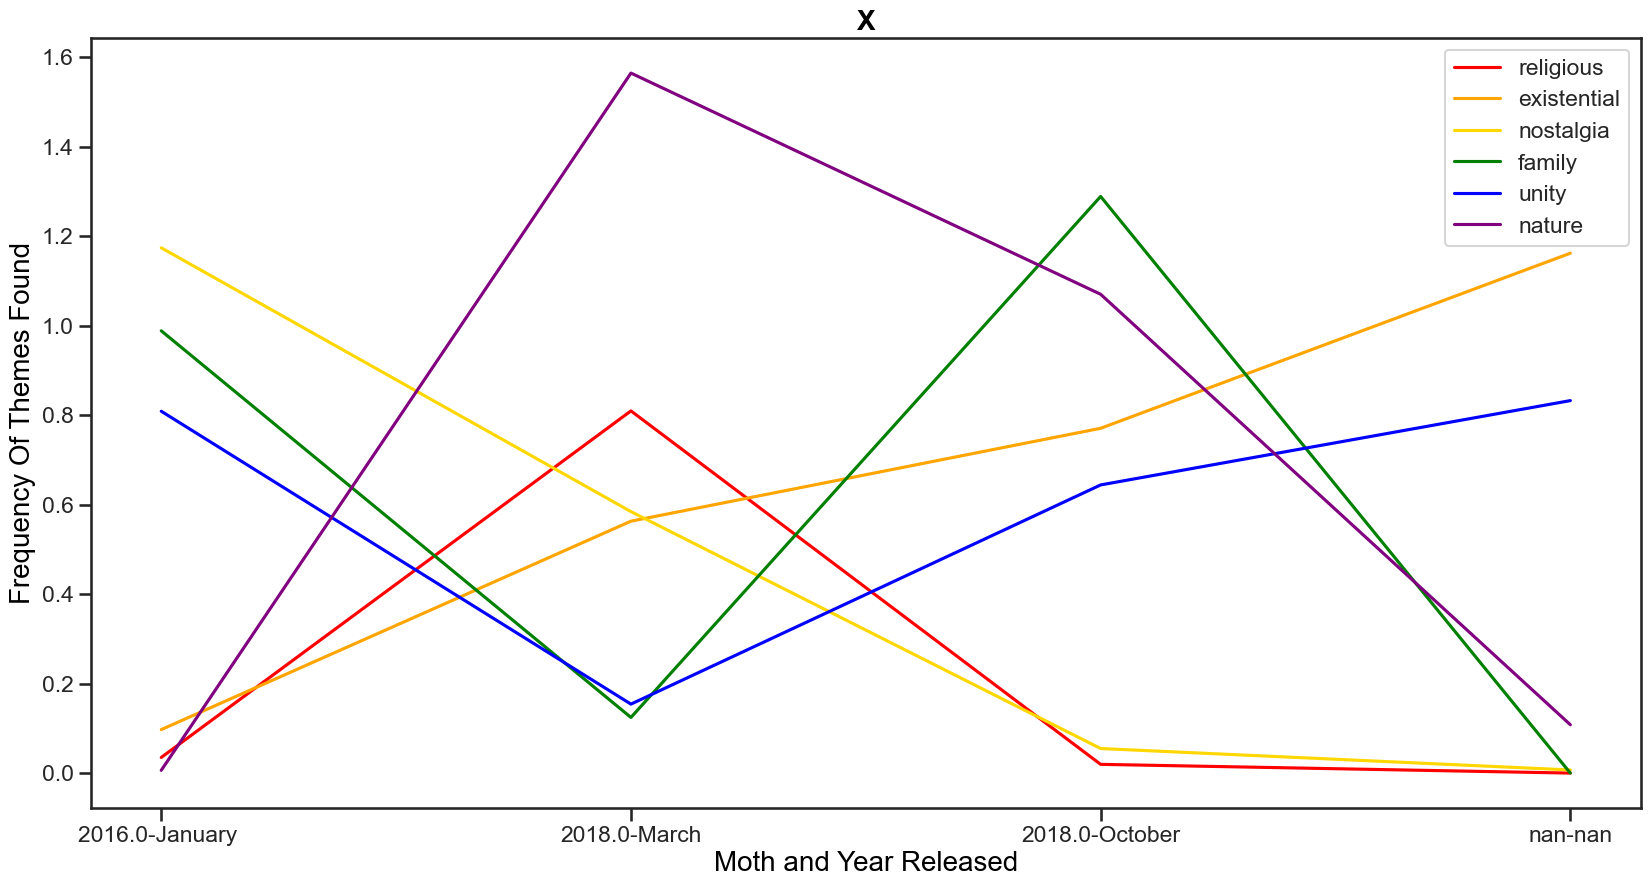

In [37]:
plt.figure(figsize = (20,10))
plt.plot(year_topics["Year_Month"], year_topics['religious'], label = topic_labels[0], c='red')
plt.plot(year_topics["Year_Month"], year_topics['existential'], label = topic_labels[1], c='orange')
plt.plot(year_topics["Year_Month"], year_topics['nostalgia'], label = topic_labels[2], c='gold')
plt.plot(year_topics["Year_Month"], year_topics['family'], label = topic_labels[3], c='green')
plt.plot(year_topics["Year_Month"], year_topics['unity'], label = topic_labels[4], c='blue')
plt.plot(year_topics["Year_Month"], year_topics['nature'], label = topic_labels[5], c='purple')
plt.legend()

#label to help keep track of each individual plots

#setting axis, title, + font
font1 = {'family':'sans', 'color': 'black', 'size':20}
plt.xlabel("Moth and Year Released", loc='center', fontdict=font1)
plt.ylabel("Frequency Of Themes Found", loc='center', fontdict=font1)
plt.title("X", loc='center', fontdict=font1, fontweight='bold')


#topic_labels = ['religious', 'existential', 'nostalgia', 'family', 'unity', 'nature']

SENTIMENT POLARITY

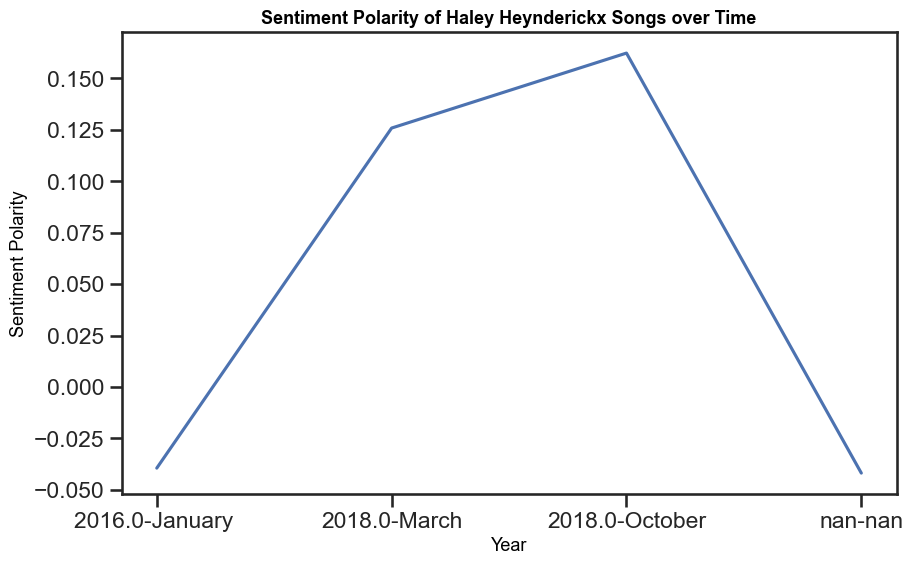

In [38]:
from textblob import TextBlob

# Define a function to get the sentiment polarity score for each set of lyrics
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the lyrics column of the songs DataFrame
songs['Sentiment_Polarity'] = songs['Lyric'].apply(get_sentiment_polarity)

# Group the songs by year and calculate the mean sentiment polarity for each year
year_sentiment = songs.groupby('Year_Month')['Sentiment_Polarity'].mean().reset_index()

# Plot the sentiment polarity over time
font1 = {'family':'sans', 'color': 'black', 'size':13}
plt.figure(figsize=(10, 6))
plt.plot(year_sentiment['Year_Month'], year_sentiment['Sentiment_Polarity'])
plt.xlabel('Year', loc='center', fontdict=font1)
plt.ylabel('Sentiment Polarity', loc='center', fontdict=font1)
plt.title('Sentiment Polarity of Haley Heynderickx Songs over Time', loc='center', fontdict=font1, fontweight = 'bold')
plt.show()



###Generating lyrics based on previous lyrics written###

In [1]:
###SIMPLE NEW GENERATION FOR 3 NEW LINES###
###keep to show that w/ state-size = 2 only comes up with essentially same sentence##

import markovify

# Combine all lyrics into a single string
lyrics = ' '.join(songs['Lyric'])

# Build a Markov model of the lyrics
model = markovify.Text(lyrics, state_size=2)

# Generate three new sentences
for i in range(3):
    sentence = model.make_sentence()
    print(sentence)


NameError: name 'songs' is not defined

In [44]:
###WORKS...THIS ONE BETTER THAN ONE ABOVE B/C IT MAKES MORE THAN THE SAME SENTENCE AGIAIN+ AGAIN
###KEEP

import markovify
import language_tool_python

# Combine all lyrics into a single string
lyrics = ' '.join(songs["Lyric"])

# Build a Markov model of the lyrics
model = markovify.Text(lyrics, state_size=1)

# Generate and correct new sentences
tool = language_tool_python.LanguageTool('en-US')
for i in range(2):
    # Generate a new sentence
    sentence = model.make_sentence()

    # Check if the sentence is not None
    if sentence:
        # Correct grammar errors in the sentence
        corrected_sentence = tool.correct(sentence)

    # Print the original and corrected sentences
    print('Original sentence:', sentence)
    print('Corrected sentence:', corrected_sentence)

ImportError: cannot import name 'Mapping' from 'collections' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/collections/__init__.py)

Sentiment Analysis

In [281]:
import nltk
import numpy as np
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [282]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

df['sentiment_rating'] = pd.DataFrame(df.Lyric.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_rating'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

df

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyric,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sentiment_rating,sentiment
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home wherever I go,40,NaN,NaN,NaN,NaN,0.0000,neutral
604,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home where I go someday,41,NaN,NaN,NaN,NaN,0.0000,neutral
605,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home where I go,42,NaN,NaN,NaN,NaN,0.0000,neutral
606,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home wherever I go,43,NaN,NaN,NaN,NaN,0.0000,neutral


Lyrical Density 


In [283]:
#save df w/ lyrics to a csv 
trial_df = df 
trial_df.to_csv('Lyrics-HALEY HEYNDERICKX.csv')

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyric,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sentiment_rating,sentiment
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home wherever I go,40,NaN,NaN,NaN,NaN,0.0000,neutral
604,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home where I go someday,41,NaN,NaN,NaN,NaN,0.0000,neutral
605,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home where I go,42,NaN,NaN,NaN,NaN,0.0000,neutral
606,Haley Heynderickx & Max Garcia Conover,2018.0,October,Among Horses III,Crow Song,6.0,I'll be home wherever I go,43,NaN,NaN,NaN,NaN,0.0000,neutral


#The first is using a lambda expression and a sum() method to calculate the words, and uniq words in each song

In [285]:
df['characters'] = df.Lyric.str.len()
df['words'] = df.Lyric.str.split().str.len()
df['lines'] = df.Lyric.str.split('\n').str.len()
df['uniq_words'] = df.Lyric.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['uniq_words'] / df['words']

df.head()

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyric,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sentiment_rating,sentiment,characters,words,lines,uniq_words,lexical_density
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral,30,8,1,8,1.000
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative,48,10,1,10,1.000
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral,35,8,1,7,0.875
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral,43,11,1,11,1.000
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive,32,6,1,6,1.000


In [286]:
#Renaming Columns so have Capatalized + 'Units'

df = df.rename(columns={
    'Lyric': 'Lyrics',
    'sentiment': 'Sentiment Category',
    'sentiment_rating': 'Sentiment Rating',
    'characters': 'Characters',
    'words': 'Number of Words',
    'lines': 'Number of Lines',
    'uniq_words': 'Number of Unique Words',
    'lexical_density': 'Lexical Density'
})

In [287]:
df.head()

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyrics,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Sentiment Rating,Sentiment Category,Characters,Number of Words,Number of Lines,Number of Unique Words,Lexical Density
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral,30,8,1,8,1.000
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative,48,10,1,10,1.000
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral,35,8,1,7,0.875
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral,43,11,1,11,1.000
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive,32,6,1,6,1.000


#lexical density#
#SIMPLLIFIED...HIGHER DENSITY=LYRICAL/POETICAL#
#...LOWER DENSITY = SIMPLIER/STRAIGHTFORWARD#

In [ ]:
#Then I sum columns words and number of unique words, and divide total_uniq with total_words

In [288]:
df['Number of Words'].sum()

3747

In [289]:
def total_density():
    total_words = df['Number of Words'].sum()
    print(total_words)
    total_uniq = df['Number of Unique Words'].sum()
    print(total_uniq)
    return total_uniq / total_words

print(total_density())

3747
3651
0.9743795036028823


GRAPHS

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_69318/3353712898.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)


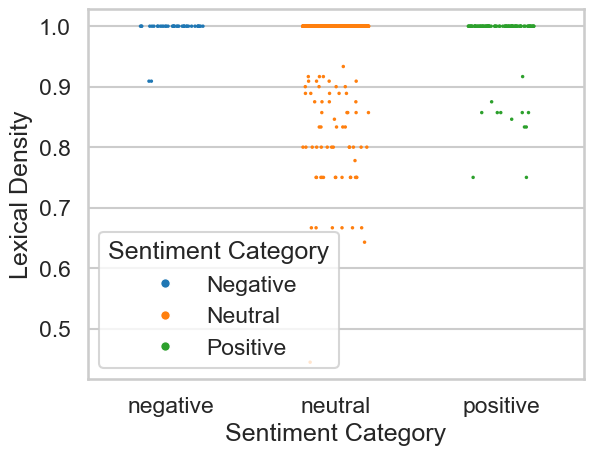

In [296]:
###WORKING...COMPARING:
#LEXICAL DESNITY VS SENTIMENT CATEGORY#

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Define a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Strip plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)

# Create a custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=7)]
plt.legend(title='Sentiment Category', loc='lower left', handles=legend_elements)

# Add labels for the x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Lexical Density')

# Show the plot
plt.show()

##figure out way to make legend plot smaller#

In [297]:
#FINDING R VALUE##
import pandas as pd

# Calculate the correlation coefficient between Sentiment Rating and Lexical Density
corr_coeff = df['Sentiment Rating'].corr(df['Lexical Density'])

# Print the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: -0.01155790658768441


ANALYSIS

ANOTHER WAY TO SHOW DATA 

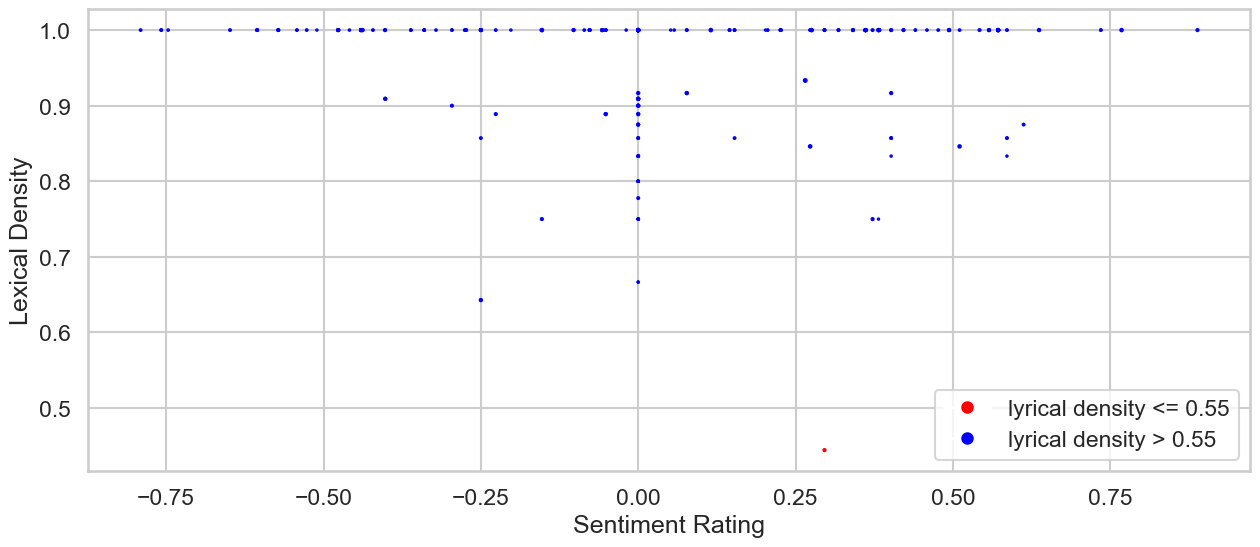

In [334]:
###RUN CODE WHEN HAVE SENTIMENTAL DATA + LYRICAL DENSITY###
### SAME AS ONE OF THE DOT BAR THINGIES IDK WAHT CALLED RN##
###PROBABLY USE DOT BAR THINGY B/C IT MAKES MORE INTUITIVE SENSE###
####KEEP THIS TO SHOW HOW ONE CAN LOOK BETTER THAN ANOTHER###

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define custom colors for the legend
colors = {'red': 'lyrical density <= 0.55', 'blue': 'lyrical density > 0.55'}

# Create custom legend elements using Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=colors['red'], markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label=colors['blue'], markerfacecolor='blue', markersize=10)]

# Create the scatter plot
df.plot.scatter(x='Sentiment Rating', y='Lexical Density', s=df['Characters']/20,
                c=np.where(df['Lexical Density'].le(0.55), "red", "blue"),
                figsize=(15, 6))

# Add the custom legend to the plot
plt.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()

#red=if lyrical density less than or equal to .55
#blue=data if lyrical density greater than .55
#The size of each dot is determined by the corresponding value in the characters column divided by 20.

In [335]:
#FINDING R VALUE##
import pandas as pd

# Calculate the correlation coefficient between Sentiment Rating and Lexical Density
corr_coeff = df['Sentiment Rating'].corr(df['Lexical Density'])

# Print the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: -0.01155790658768441


ANALYSIS

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_69318/3361886664.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)


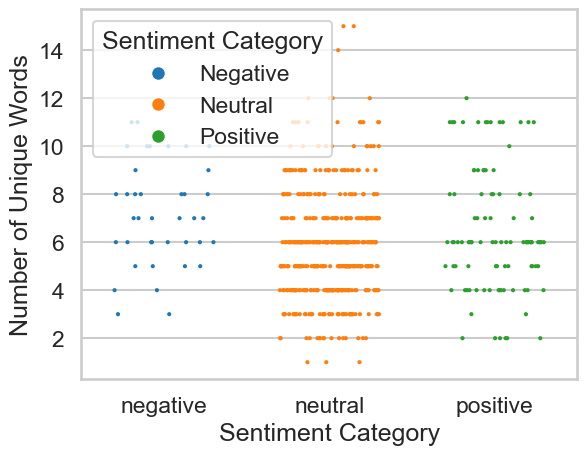

In [298]:
###WORKING...COMPARING:
#NUMBER OF UNIQUE WORDS VS SENTIMENT CATEGORY#

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Define a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Strip plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)

# Create a custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Sentiment Category', loc='upper left', handles=legend_elements)

# Add labels for the x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Unique Words')

# Show the plot
plt.show()

ANALYSIS

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_69318/2385908331.py:14: UserWarning: 
The palette list has fewer values (3) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.25, size=2, palette=custom_palette)


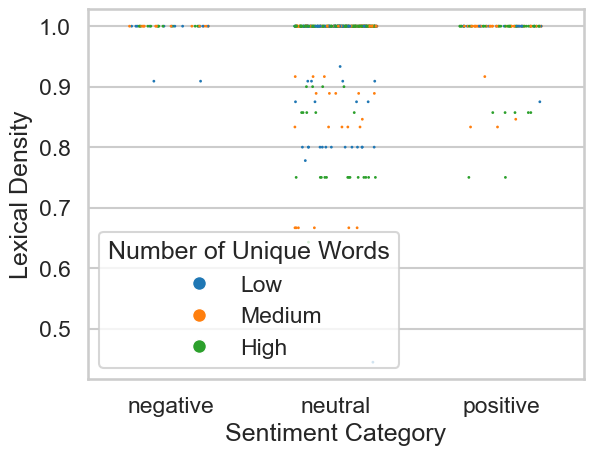

In [301]:
##THIS IS IT BUT IDK IT SUCKS ASS TO READ TBH###
###WORKING...COMPARING:
#LEXICAL DENSITY VS SENTIMENT CATEGORY vs NUMBER OF UNIQUE WORDS (dot color)#

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Define a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Strip plot with custom legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.25, size=2, palette=custom_palette)

# Create a custom legend with three dots
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Low', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Medium', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='High', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Number of Unique Words', loc='lower left', handles=legend_elements)

# Show the plot
plt.show()

In [302]:
#R VALUE BTWN LEXICAL DENSITY + NUMBER OF UNIQUE WORDS#

import pandas as pd

# Calculate the correlation coefficient between Lexical Density and Number of Unique Words
corr_coeff = df['Lexical Density'].corr(df['Number of Unique Words'])

# Print the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: 0.1389796766541301


In [303]:
#R VALUE TWN SENTIMENT CATEGORY + LEXICAL DENSITY#

import pandas as pd

# Group the data by Sentiment Category and calculate the mean Lexical Density for each group
grouped_df = df.groupby('Sentiment Category')['Lexical Density'].mean()

# Calculate the correlation coefficient (r value) between Lexical Density and Sentiment Category
corr_coeff = grouped_df.corr(pd.Series([0, 1, 2]))

# Print the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: nan


In [304]:
#R VALUE TWN SENTIMENT CATEGORY + LEXICAL DENSITY#
# If the absolute value is close to 0
# then there is a weak or no monotonic relationship between the variables.

from scipy.stats import kendalltau

# Calculate the Kendall rank correlation coefficient between Lexical Density and Sentiment Category
kendall_coeff, kendall_pvalue = kendalltau(df['Lexical Density'], df['Sentiment Category'])

# Print the correlation coefficient
print("Kendall Rank Correlation Coefficient:", kendall_coeff)

Kendall Rank Correlation Coefficient: -0.015247870182067247


In [305]:
#R VALUE NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY#
import pandas as pd

# Group the data by Sentiment Category and calculate the mean Number of Unique Words for each group
grouped_df = df.groupby('Sentiment Category')['Number of Unique Words'].mean()

# Calculate the correlation coefficient (r value) between Number of Unique Words and Sentiment Category
corr_coeff = grouped_df.corr(pd.Series([0, 1, 2]))

# Print the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: nan


In [306]:
#NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY#
# If the absolute value is close to 0
# then there is a weak or no monotonic relationship between the variables.

from scipy.stats import kendalltau

# Calculate the Kendall rank correlation coefficient between Lexical Density and Sentiment Category
kendall_coeff, kendall_pvalue = kendalltau(df['Number of Unique Words'], df['Sentiment Category'])

# Print the correlation coefficient
print("Kendall Rank Correlation Coefficient:", kendall_coeff)

Kendall Rank Correlation Coefficient: -0.006623989344031223


ANALYSIS

TTR

In [307]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


text = trial_df.to_csv(sep=' ', index=False, header=False)


tokenized = word_tokenize(text)
len(tokenized)

#len(set(tokenized)) gives # of unique tokens in tokenized list
#will remove duplicates + counts only distint token
#so for example if list [the, moon, the, flower] gives 3 
#but len(tokenized) will give 4
len(set(tokenized))


1098

In [308]:
#I BELIEVE THIS IS THE TTR...HIGHER TTR INDICATES GREATER DIVERSITY OF 
# VOCAB + THEREFORE HIGHER LEXICAL RICHNESS

def lexical_richness(text):
    return len(set(text)) / len(text)

#get the percentage
lexical_richness(tokenized)

0.05228073516807923

In [310]:
#PROB NOT GOING TO USE THIS...AXIS AREN'T LABLED..AND IDK THEM ALL#
#df.hist(sharey=True, layout=(4, 4), figsize=(15, 14))

Common Words

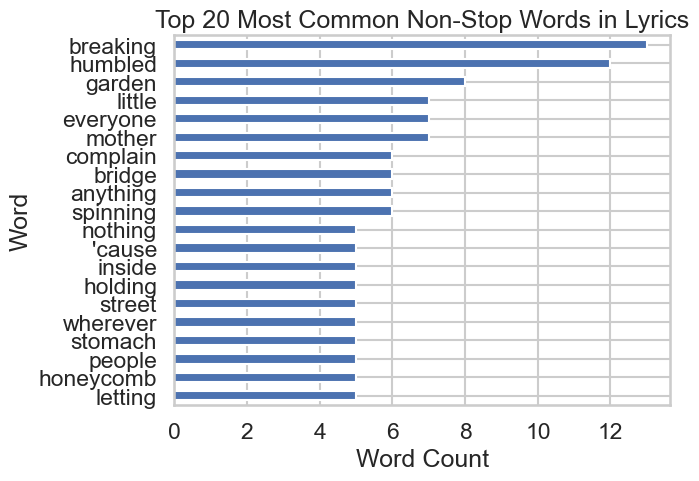

In [313]:
#MOST COMMON WORDS THAT AREN'T STOP WORDS##
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# stopwords...from above 
stop_words.extend(["oh", "like", "go", "sha", "la", "well", "could", "should", "would", "say", "got", "put", "knows", "known", "cause", "try", "yet", "still", "get", "make"])

# Tokenize the lyrics column and filter out stop words and words with length <= 5
words = [w for w in nltk.word_tokenize(' '.join(df.Lyrics).lower()) if w not in stopwords.words('english') and len(w) > 5]

# Create a pandas series with the word counts and plot the top 20 words in a horizontal bar chart
pd.Series(words).value_counts()[:20][::-1].plot(kind='barh')

# Set the plot title and labels
plt.title('Top 20 Most Common Non-Stop Words in Lyrics')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()

SENTIMENT ANALYSIS PT 2

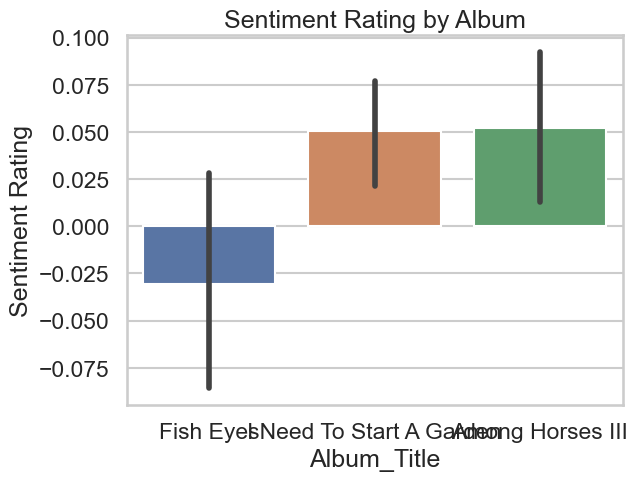

: 

In [393]:
import seaborn as sns

# Create a palette of pastel colors
palette = sns.color_palette('pastel')

# Create a bar plot of sentiment rating by album with pastel-colored bars
sns.barplot(x='Album_Title', y='Sentiment Rating', data=df) #palette=palette)

# Set the plot title and labels
plt.title('Sentiment Rating by Album')
plt.xlabel('Album_Title')
plt.ylabel('Sentiment Rating')
plt.show()

###CLEAN IT UP

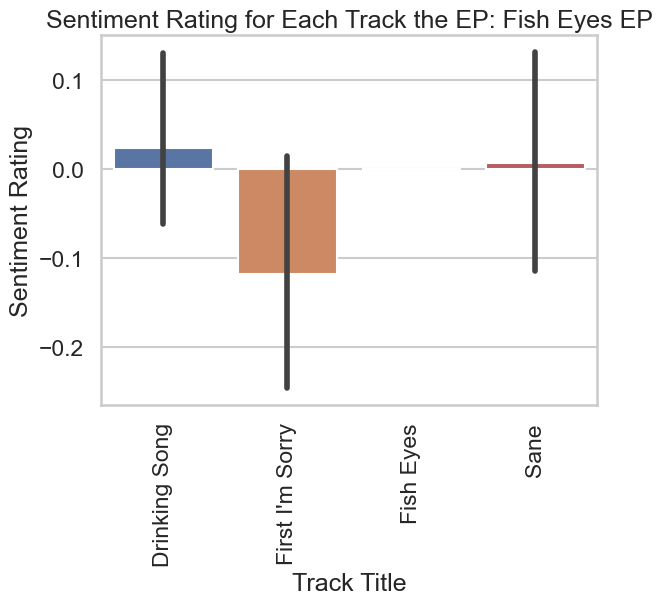

In [392]:
#KEEP...SENTIMENT RATING FOR EACH TRACK...
# BARCHART BEST WAY TO LOOK AT THIS...
# ALBUM 1/EP...FISH EYES EP#

import seaborn as sns

# Create a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Fish Eyes'])

# Set the plot title and labels
plt.title('Sentiment Rating for Each Track the EP: Fish Eyes EP')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()



In [385]:
###FIXING UP WHITE SPACE SO HOPEFULLY TITLE CAN BE RECONIZED###
# Clean up the 'Album_Title' column by stripping leading and trailing whitespace
df['Album_Title'] = df['Album_Title'].str.strip()

# Check the list of unique album titles again
unique_albums = df['Album_Title'].unique()
print(unique_albums)

[nan 'Fish Eyes' 'I Need To Start A Garden' 'Among Horses III']


In [386]:
###CHECKING TO MAKE SURE TITLE CORRECT IN DF###
unique_albums = df['Album_Title'].unique()
"I Need To Start A Garden" in unique_albums


True

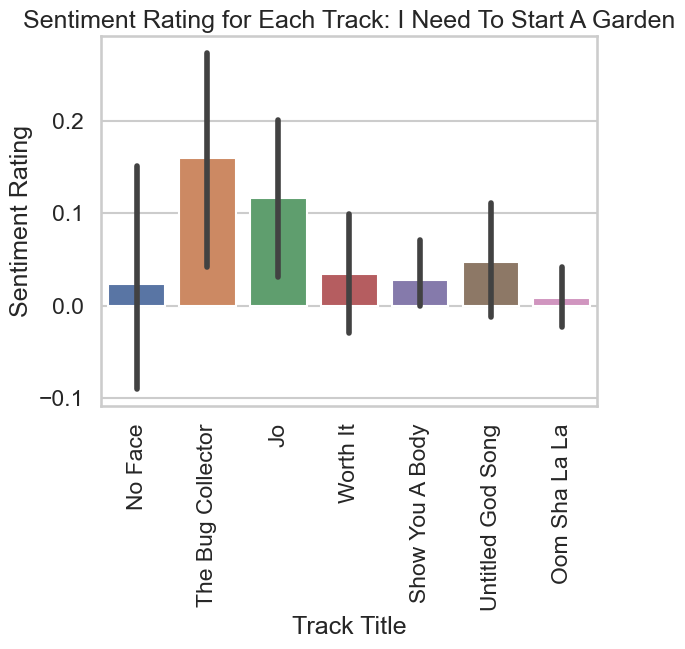

In [387]:
#KEEP...SENTIMENT RATING FOR EACH TRACK...
# BARCHART BEST WAY TO LOOK AT THIS...
# ALBUM 2...I NEED TO START A GARDEN#

import seaborn as sns

# Create a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data = df[df['Album_Title'] == "I Need To Start A Garden"])

# Set the plot title and labels
plt.title('Sentiment Rating for Each Track: I Need To Start A Garden')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()



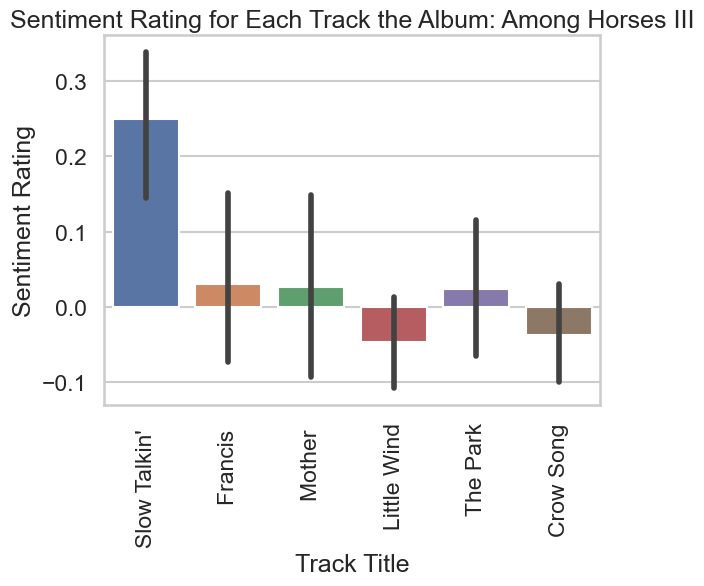

In [388]:
#KEEP...SENTIMENT RATING FOR EACH TRACK...
# BARCHART BEST WAY TO LOOK AT THIS...
# ALBUM 4...AMONG HORSES III#


import seaborn as sns

# Create a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Among Horses III'])

# Set the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: Among Horses III')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

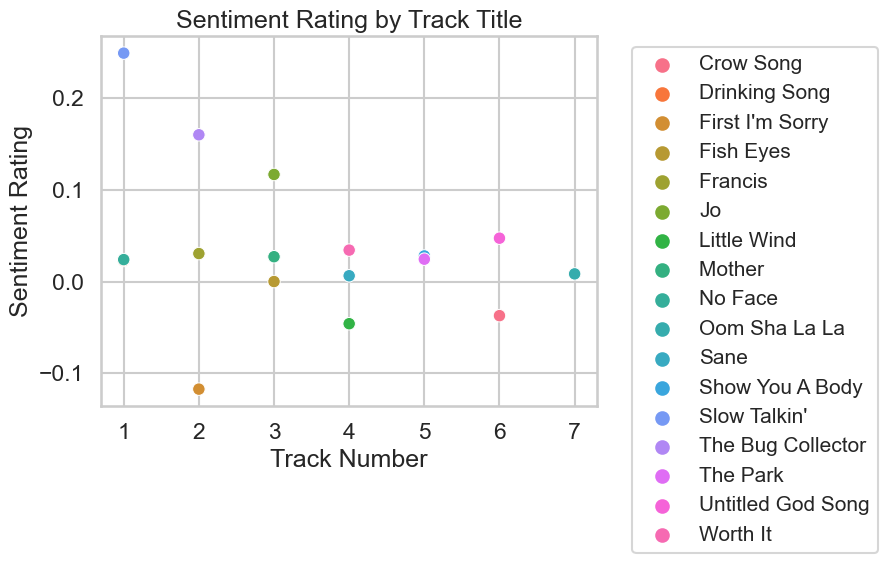

In [389]:
#ALL SONGS SENTIMENT RATING BY TITLE#

# Group the data by track title and track number and compute the average sentiment rating for each track
grouped = df.groupby(['Track_Title', 'Track_Number'])['Sentiment Rating'].mean().reset_index()

# Create a scatter plot of sentiment rating by track number for each track title
sns.scatterplot(x='Track_Number', y='Sentiment Rating', hue='Track_Title', data=grouped)

# Set the plot title and labels
plt.title('Sentiment Rating by Track Title')
plt.xlabel('Track Number')
plt.ylabel('Sentiment Rating')

# Set the font size and location of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

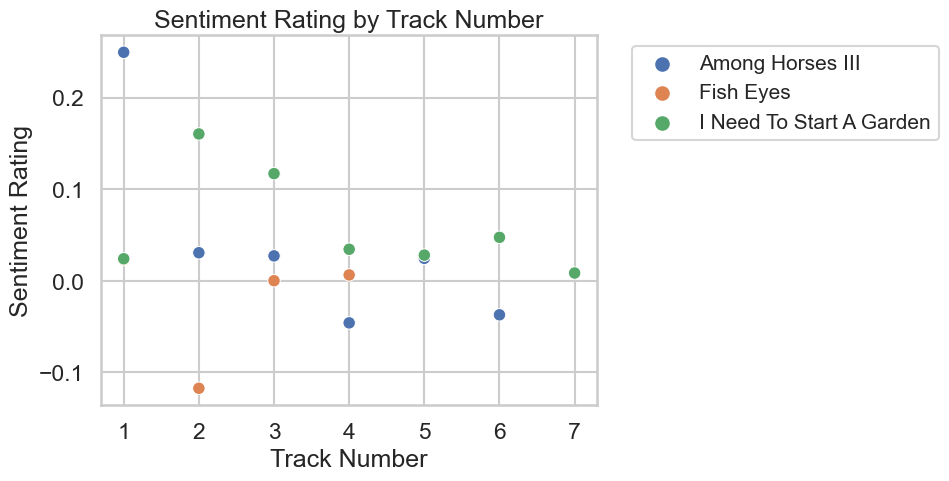

In [390]:
#SENTIMENT RATING ALBUM...COMPARING TRACK BY TRACK#

# Group the data by album name, track number, and track title, and compute the average sentiment rating for each track
grouped = df.groupby(['Album_Title', 'Track_Number', 'Track_Title'])['Sentiment Rating'].mean().reset_index()

# Sort the dataframe by album name and track number
grouped = grouped.sort_values(['Album_Title', 'Track_Number'])

# Create a scatter plot of sentiment rating by track number for each track title
sns.scatterplot(x='Track_Number', y='Sentiment Rating', hue='Album_Title', data=grouped)

# Set the plot title and labels
plt.title('Sentiment Rating by Track Number')
plt.xlabel('Track Number')
plt.ylabel('Sentiment Rating')

# Set the font size and location of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()


In [391]:
df[df['Track_Title'] == 'Fish Eyes']


,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyrics,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Sentiment Rating,Sentiment Category,Characters,Number of Words,Number of Lines,Number of Unique Words,Lexical Density
144,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Sailor eyes,1,NaN,NaN,NaN,NaN,0.0,neutral,11,2,1,2,1.0
145,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,On my tongue,2,NaN,NaN,NaN,NaN,0.0,neutral,12,3,1,3,1.0
146,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Who is above you,3,NaN,NaN,NaN,NaN,0.0,neutral,16,4,1,4,1.0
147,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Oh I don't know,4,NaN,NaN,NaN,NaN,0.0,neutral,15,4,1,4,1.0
148,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Fill me with,5,NaN,NaN,NaN,NaN,0.0,neutral,12,3,1,3,1.0
149,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Your breath again,6,NaN,NaN,NaN,NaN,0.0,neutral,17,3,1,3,1.0
150,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Rebuild me again,7,NaN,NaN,NaN,NaN,0.0,neutral,16,3,1,3,1.0
151,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Am I down in the river bed this time,8,NaN,NaN,NaN,NaN,0.0,neutral,36,9,1,9,1.0
152,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Picking fishheads and eating out their eyes?,9,NaN,NaN,NaN,NaN,0.0,neutral,44,7,1,7,1.0
153,Haley Heynderickx,2016.0,January,Fish Eyes,Fish Eyes,3.0,Am I down in the dust?,10,NaN,NaN,NaN,NaN,0.0,neutral,22,6,1,6,1.0


ANALYSIS